# Proyek Analisis Data: E-Commerce
- **Nama:** Aldhyno Yoghatama
- **Email:** aldhynojr@gmail.com
- **ID Dicoding:** aldhyno

## Menentukan Pertanyaan Bisnis


- Produk kategori apa yang paling banyak di check out ?
- Bagaimana jumlah pemesanan yang terjadi dalam satu bulan ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load data

In [2]:
data1 = pd.read_csv('products_dataset.csv')
data2 = pd.read_csv('orders_dataset.csv')
data3 = pd.read_csv('order_items_dataset.csv')

### Assessing Data

menampilkan 5 baris pada awal data

In [3]:
data1.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
data2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
data3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Mengidentifikasi missing value pada data dan duplicate pada data

In [6]:
data1.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [8]:
print("Jumlah duplikasi data: ",data1.duplicated().sum())

Jumlah duplikasi data:  0


In [10]:
data2.isnull().sum()

order_id                           0
customer_id                        0
order_status                       1
order_purchase_timestamp           1
order_approved_at                 43
order_delivered_carrier_date     405
order_delivered_customer_date    692
order_estimated_delivery_date      1
dtype: int64

In [11]:
print("Jumlah duplikasi data: ", data2.duplicated().sum())

Jumlah duplikasi data:  0


In [12]:
data3.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          1
dtype: int64

In [13]:
print("Jumlah duplikasi data: ", data3.duplicated().sum())

Jumlah duplikasi data:  0


Mengecek data type pada setiap data

In [14]:
data1.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [16]:
data2.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [20]:
data3.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Terdapat kesalahan pada data types pada data 2 yaitu orders dataset. Dimana seharusnya
*   order_purchase_timestamp
*   order_approved_at
*   order_delivered_carier_date
*   order_delivered_customer_date
*   order_estimated_delivery_date <br>
data types nya berupa datetime ataupun int






### Cleaning Data

Membersihkan data tabel product data1

Melakukan proses Drop data pada yang mempunyai value pada data product

In [17]:
data1.dropna(axis=0, inplace=True, subset=['product_category_name'])

melakukan drop data pada orders data2 yang memiliki null

In [18]:
data2.dropna(axis=0, inplace=True)

In [19]:
print("Jumlah duplikasi: ", data2.isna().sum())

Jumlah duplikasi:  order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Melakukan penyesuaian Type data yang masih salah pada data2 data orders

In [27]:
data3['shipping_limit_date'] = pd.to_datetime(data3['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

In [28]:
columns = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in columns:
    data2[column] = pd.to_datetime(data2[column])

Penggabungan tabel order dengan tabel item

In [29]:
data_13 = pd.merge(
    left=data1,
    right=data3,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

## Exploratory Data Analysis (EDA)

### Explore 5 kategori to produk

In [30]:
top_prod = data_13.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).head(5)
top_prod

product_category_name
cama_mesa_banho           2561
beleza_saude              2373
esporte_lazer             2057
informatica_acessorios    1848
moveis_decoracao          1710
Name: order_id, dtype: int64

#### Explore penjualan pada satu bulan

In [32]:
data2.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [33]:
group_param = data2['order_purchase_timestamp'].dt.to_period("M")
monthly_order = data2.groupby(group_param).order_id.nunique()
monthly_order

order_purchase_timestamp
2016-10      63
2017-01     178
2017-02     390
2017-03     613
2017-04     526
2017-05     850
2017-06     740
2017-07     895
2017-08    1024
2017-09     968
2017-10    1027
2017-11    1795
2017-12    1318
2018-01    1701
2018-02    1585
2018-03    1641
2018-04    1572
2018-05    1606
2018-06    1412
2018-07    1470
2018-08    1549
Freq: M, Name: order_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Axes: xlabel='product_category_name'>

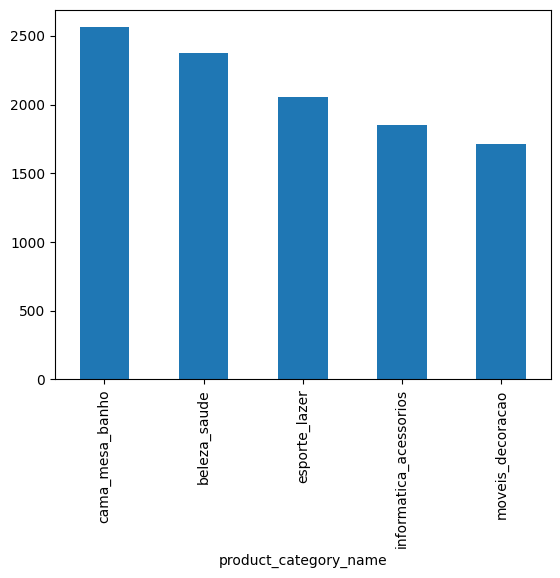

In [31]:
top_prod.plot.bar()

### Pertanyaan 2:

<Axes: xlabel='order_purchase_timestamp'>

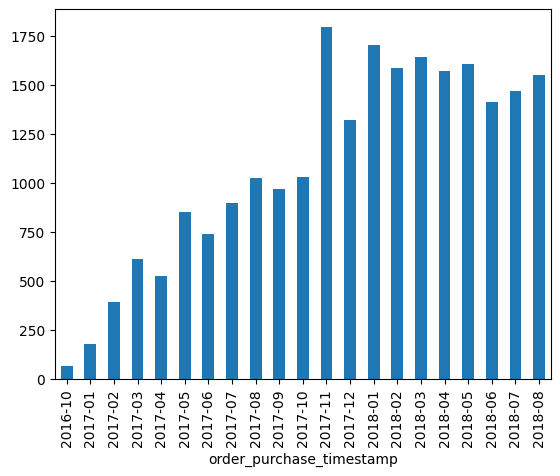

In [34]:
monthly_order.plot.bar()

## Conclusion

- Penjualan produk paling banyak dibeli antara lain <br>
cama_mesa_banho dengan pembelian mencapai  **2561** <br>
beleza_saude dengan pembelian mencapai  **2373** <br>
esporte_lazer dengan pembelian mencapai **2057** <br>
informatica_acessorios dengan pembelian mencapai **1848** <br>
moveis_decoracao dengan pembelian mencapai **1710** <br>
- Conclution pertanyaan 2
 Penjualan yang diperoleh E-commerce pada bulan November pada tahun 2017 merupakan penjualan terbanyak, sedangkan pada bulan oktober 2016 merupakan penjualan paling sedikit yang pernah diperoleh. Dilihat dari grafik tersebut penjualan meningkat (linear)

In [35]:
data_13.to_csv("all_data.csv", index=False)